<a href="https://colab.research.google.com/github/ddoneu/ECON3916-Statistical-Machine-Learning/blob/main/Lab5/Lab5_Probability_%E2%80%94_The_Engine_of_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

55524

[1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1
 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0
 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1
 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0
 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0
 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0
 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0
 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1
 1 0 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1
 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0
 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0
 1 0 0 1 0 1 0 1 1 0 0 1 

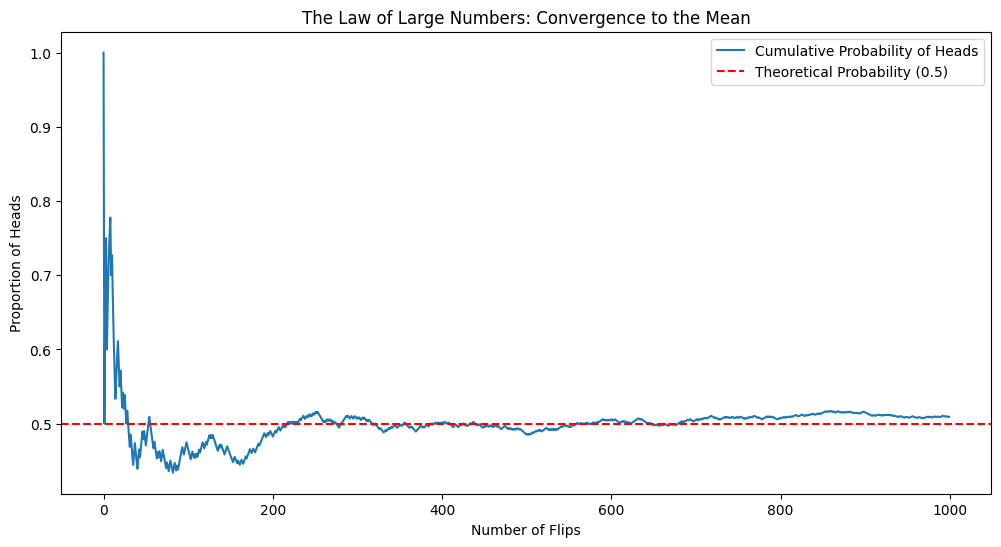

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_law_of_large_numbers(n_flips):
    # Simulate n_flips of a fair coin (0 or 1)
    flips = np.random.choice([0,1],size=n_flips, p=[0.5,0.5])

    # Calculate cumulative average
    # cumsum adds them up sequentially
    # Divide by range(1, n+1) to get average at each step
    cumulative_averages = np.cumsum(flips) / np.arange(1, n_flips + 1)

    print(flips)

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_averages, label='Cumulative Probability of Heads')
    plt.axhline(0.5, color='red', linestyle='--', label='Theoretical Probability (0.5)')
    plt.title('The Law of Large Numbers: Convergence to the Mean')
    plt.xlabel('Number of Flips')
    plt.ylabel('Proportion of Heads')
    plt.legend()
    plt.show()

# Run the simulation
simulate_law_of_large_numbers(1000)

In [3]:
def monty_hall_sim(n_games):
    switch_wins = 0
    stay_wins = 0

    for _ in range(n_games):
        doors = [0, 1, 2]
        prize = np.random.choice(doors)
        choice = np.random.choice(doors)

        # Host opens a door
        # Host cannot open 'prize' and cannot open 'choice'
        openable_doors = [d for d in doors if d != prize and d != choice]
        host_opens = np.random.choice(openable_doors)

        # Strategy: Stay
        if choice == prize:
            stay_wins += 1

        # Strategy: Switch
        # The switch choice is the door that is not 'choice' and not 'host_opens'
        switch_choice = [d for d in doors if d != choice and d != host_opens]
        if switch_choice[0] == prize:
            switch_wins += 1

    print(f"Win Rate (Stay): {stay_wins/n_games:.2%}")
    print(f"Win Rate (Switch): {switch_wins/n_games:.2%}")

monty_hall_sim(10000)


Win Rate (Stay): 33.23%
Win Rate (Switch): 66.77%


💼 The Business Case
A SaaS company forecasts revenue based on two uncertain variables:

Churn Rate: People cancelling (Normal Dist: Mean=10%, SD=2%).
New Sales: New customers (Normal Dist: Mean=$1.5M, SD=$500k).
We want to find the 95% VaR: The "Safety Margin" revenue level that we are 95% sure we will exceed.

Probability of Revenue Decline: 18.57%
95% Value at Risk (Worst Case): $9,597,066.73


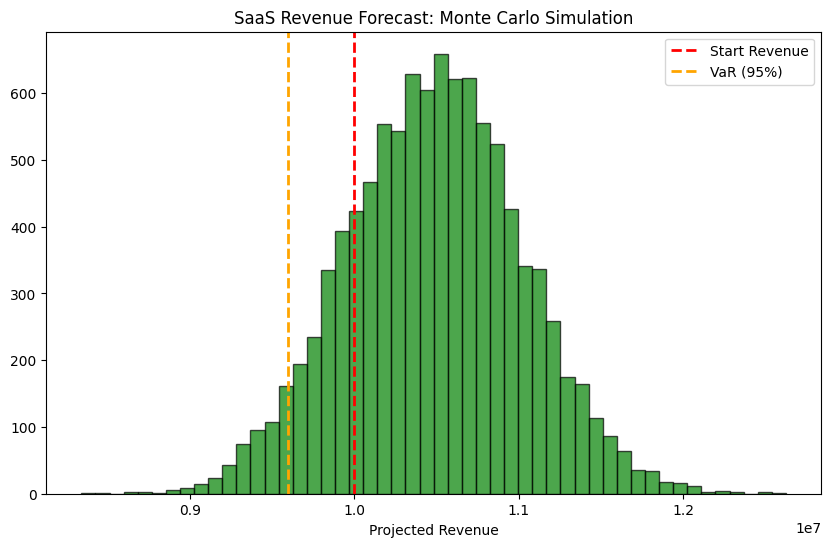

In [4]:
def saas_risk_model(n_sims):
    base_rev = 10_000_000

    # Stochastic Inputs
    # Churn is centered at 10% but can vary (Standard Deviation 2%)
    churn_sims = np.random.normal(0.10, 0.02, n_sims)
    # Sales centered at $1.5M, varies by $500k
    sales_sims = np.random.normal(1_500_000, 500_000, n_sims)

    # The Transfer Function (The Business Logic)
    net_revenue = base_rev * (1 - churn_sims) + sales_sims

    # Risk Metrics
    # Probability that we end the year with LESS money than we started
    prob_loss = np.mean(net_revenue < base_rev)

    # Value at Risk (95% Confidence)
    # We are 95% sure revenue will be ABOVE this number (the 5th percentile)
    var_95 = np.percentile(net_revenue, 5)

    print(f"Probability of Revenue Decline: {prob_loss:.2%}")
    print(f"95% Value at Risk (Worst Case): ${var_95:,.2f}")

    # Visualization
    plt.figure(figsize=(10,6))
    plt.hist(net_revenue, bins=50, alpha=0.7, color='green', edgecolor='black')
    plt.axvline(base_rev, color='red', linestyle='dashed', linewidth=2, label='Start Revenue')
    plt.axvline(var_95, color='orange', linestyle='dashed', linewidth=2, label='VaR (95%)')
    plt.title('SaaS Revenue Forecast: Monte Carlo Simulation')
    plt.xlabel('Projected Revenue')
    plt.legend()
    plt.show()

saas_risk_model(10000)